
### Iyer, Anirudh username: aniiyer

Question 1: 

        latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0      -34.45902  150.88040       326.5  0.60   0.71  2019-08-01       246   
1      -31.70724  151.07191       367.0  0.56   0.69  2019-08-01       247   
2      -31.39626  149.65253       325.2  0.68   0.74  2019-08-01       247   
3      -30.39774  152.06432       347.8  0.48   0.65  2019-08-01       247   
4      -31.20248  151.89766       350.7  0.50   0.66  2019-08-01       247   
...          ...        ...         ...   ...    ...         ...       ...   
184773 -32.37209  116.10032       296.1  0.48   0.40  2019-09-30      1702   
184774 -32.38958  116.11151       296.1  0.48   0.40  2019-09-30      1702   
184775 -33.12481  116.03968       299.9  0.47   0.40  2019-09-30      1702   
184776 -33.63480  122.92641       296.2  0.43   0.38  2019-09-30      1702   
184777 -33.63897  122.93050       297.3  0.44   0.38  2019-09-30      1702   

       satellite instrument confidence  version  bright_ti5   f

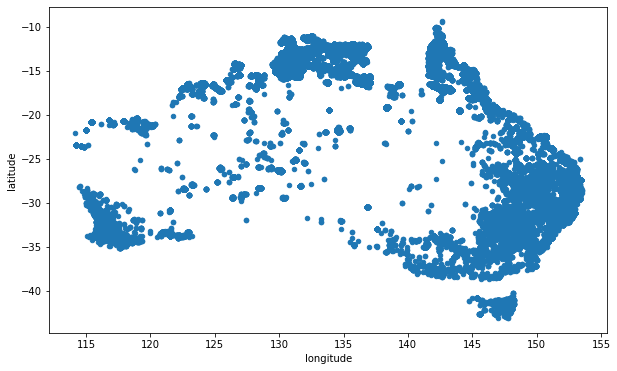

In [63]:

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv('fire_archive_V1_96617.csv')
print(data)
data.plot(x='longitude',y='latitude',kind="scatter",figsize=(10,6))
plt.show()


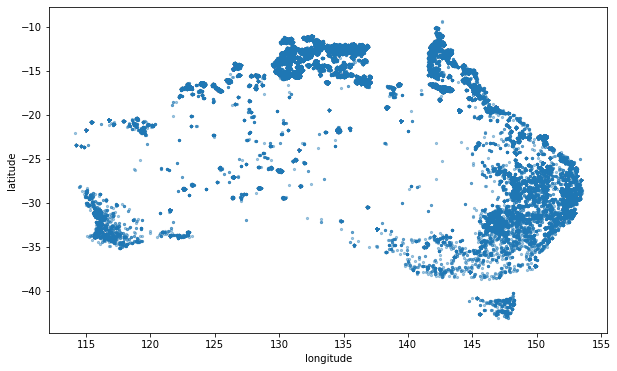

In [64]:
#Adjusting alpha and marker size to compensate for overplotting.

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv('fire_archive_V1_96617.csv')
data.plot(x='longitude',y='latitude',alpha=0.4,kind="scatter",figsize=(10,6),marker="o",s=5)
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

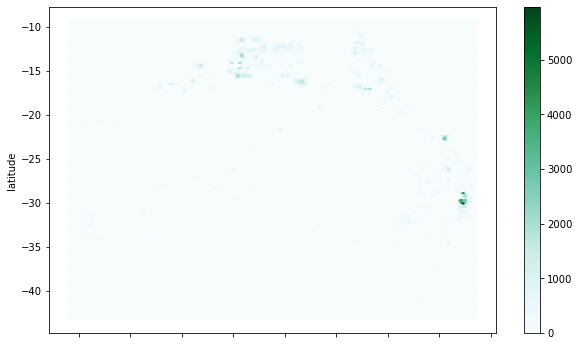

In [65]:
#Hexbin Plot

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv('fire_archive_V1_96617.csv')
data.plot.hexbin(x='longitude',y='latitude',figsize=(10,6))#,gridsize=(10,6))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

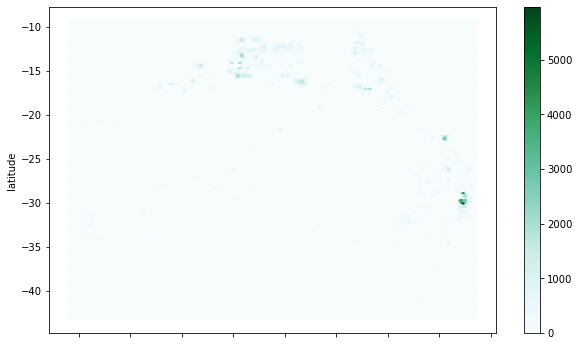

In [66]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv('fire_archive_V1_96617.csv')
data.plot.hexbin(x='longitude',y='latitude',figsize=(10,6),gridsize=100)

<AxesSubplot:>

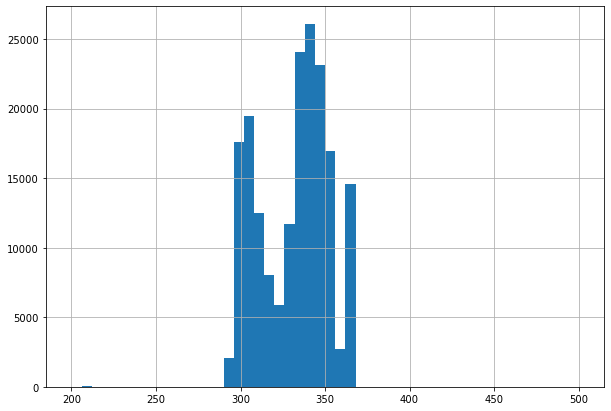

In [67]:
data['bright_ti4'].hist(bins=50,range=(200,500),figsize =(10, 7))


In [68]:
#Subsampling the dataset

import random
subsampled=pd.DataFrame(columns=data.columns)
subsample_per=0.02
new_samp_size=int(subsample_per*len(data))
for i in range(1,new_samp_size):
    randomrownr=random.randint(1,len(data)-1)
    subsampled.loc[i]=data.loc[randomrownr]
print(subsampled)

      latitude  longitude  bright_ti4  scan  track    acq_date acq_time  \
1    -14.63552  130.68666       305.0  0.41   0.37  2019-08-04     1625   
2    -16.82211  142.70921       344.9  0.42   0.45  2019-09-10      342   
3    -13.28940  142.53610       308.4  0.40   0.37  2019-08-11     1553   
4    -15.55391  131.55923       335.0  0.42   0.61  2019-08-23     1709   
5    -30.09147  152.15913       367.0  0.53   0.42  2019-09-09      356   
...        ...        ...         ...   ...    ...         ...      ...   
3690 -14.71819  130.76129       301.1  0.45   0.47  2019-08-13     1657   
3691 -35.54313  138.27344       348.5  0.39   0.36  2019-08-06      433   
3692 -29.29895  149.45274       332.7  0.48   0.40  2019-08-13      403   
3693 -30.24930  115.18501       367.0  0.37   0.58  2019-08-15      647   
3694 -29.71145  152.12668       339.5  0.46   0.39  2019-09-16     1442   

     satellite instrument confidence version  bright_ti5   frp type  
1            N      VIIRS    

Question 2: Visualizing class membership

In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

data=pd.read_csv('fire_archive_V1_96617.csv');

<AxesSubplot:>

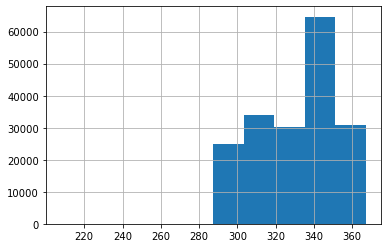

In [70]:
data['bright_ti4'].hist()

In [71]:
saturated = pd.DataFrame()
saturated = data.loc[(data['bright_ti4'] > 300)]

not_saturated = pd.DataFrame()
not_saturated = data.loc[(data['bright_ti4']) < 300]

In [72]:
marker_size_1 = saturated['bright_ti4'] / 100
marker_size_2 = not_saturated['bright_ti4'] / 100

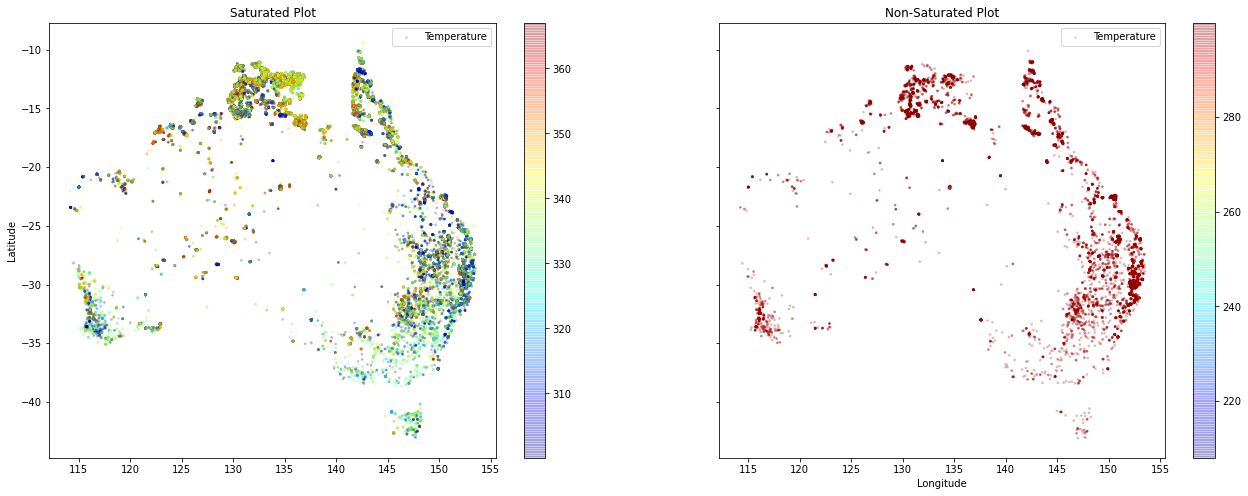

In [140]:
%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(22,8),sharex = True, sharey = True)
plot1 = ax[0].scatter('longitude','latitude', data= saturated, alpha = 0.2, s = marker_size_1, label="Temperature",
                     c= 'bright_ti4', cmap = plt.get_cmap('prism'))
ax[0].set_ylabel('Latitude')
ax[0].set_title('Saturated Plot')
ax[0].legend()
fig.colorbar(plot1, ax= ax[0])

plot2  = ax[1].scatter('longitude','latitude',data = not_saturated, alpha = 0.2, s = marker_size_2, label="Temperature",
                     c= 'bright_ti4', cmap = plt.get_cmap('prism'))
ax[1].set_xlabel('Longitude')
ax[1].set_title('Non-Saturated Plot')
ax[1].legend()
fig.colorbar(plot2, ax = ax[1])
plt.show()

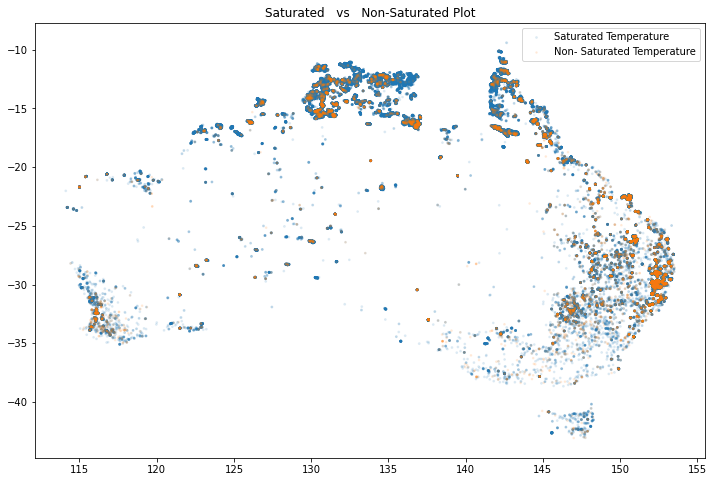

In [74]:
plt.figure(figsize=(12,8))
plt.scatter('longitude','latitude', data= saturated, alpha = 0.2, s = marker_size_1, label="Saturated Temperature",
                     cmap = 'Reds')

plt.scatter('longitude','latitude',data = not_saturated, alpha = 0.2, s = marker_size_2, label="Non- Saturated Temperature",
                     cmap = 'Blues')
plt.title('Saturated   vs   Non-Saturated Plot')
plt.set_xlabel = 'Longitude'
plt.set_ylabel = 'Latitude'
plt.legend()
plt.show()

Question 3: Regression Sydney Datase

In [75]:
import csv
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression, Lasso, ElasticNet
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns

In [76]:
house_price = pd.read_csv('data.csv') 

In [77]:
house_price.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Determine which features are continuous vs. categorical. Drop rows without a valid sales price.

In [78]:
house_price.drop(house_price[house_price.price == 0.0].index, inplace=True)

In [79]:
house_price.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [80]:
categorical_variables = house_price.select_dtypes(exclude='number').columns.tolist()
categorical_variables

['date', 'street', 'city', 'statezip', 'country']

In [81]:
continuous_variables = house_price.select_dtypes(include='number').columns.tolist()
continuous_variables

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

Visualize the univariate distribution of each continuous variable, and the distribution of the target.
Do you notice anything? Is there something that might require special treatment?

In [82]:
prices = house_price['price']
bedrooms = house_price['bedrooms']
bathrooms = house_price['bathrooms']
sqft_living = house_price['sqft_living']
sqft_lot = house_price['sqft_lot']
floors = house_price['floors']
views = house_price['view']
conditions = house_price['condition']
sqft_above = house_price['sqft_above']
sqft_basement = house_price.sqft_basement
year_built = house_price.yr_built
year_renovated = house_price.yr_renovated

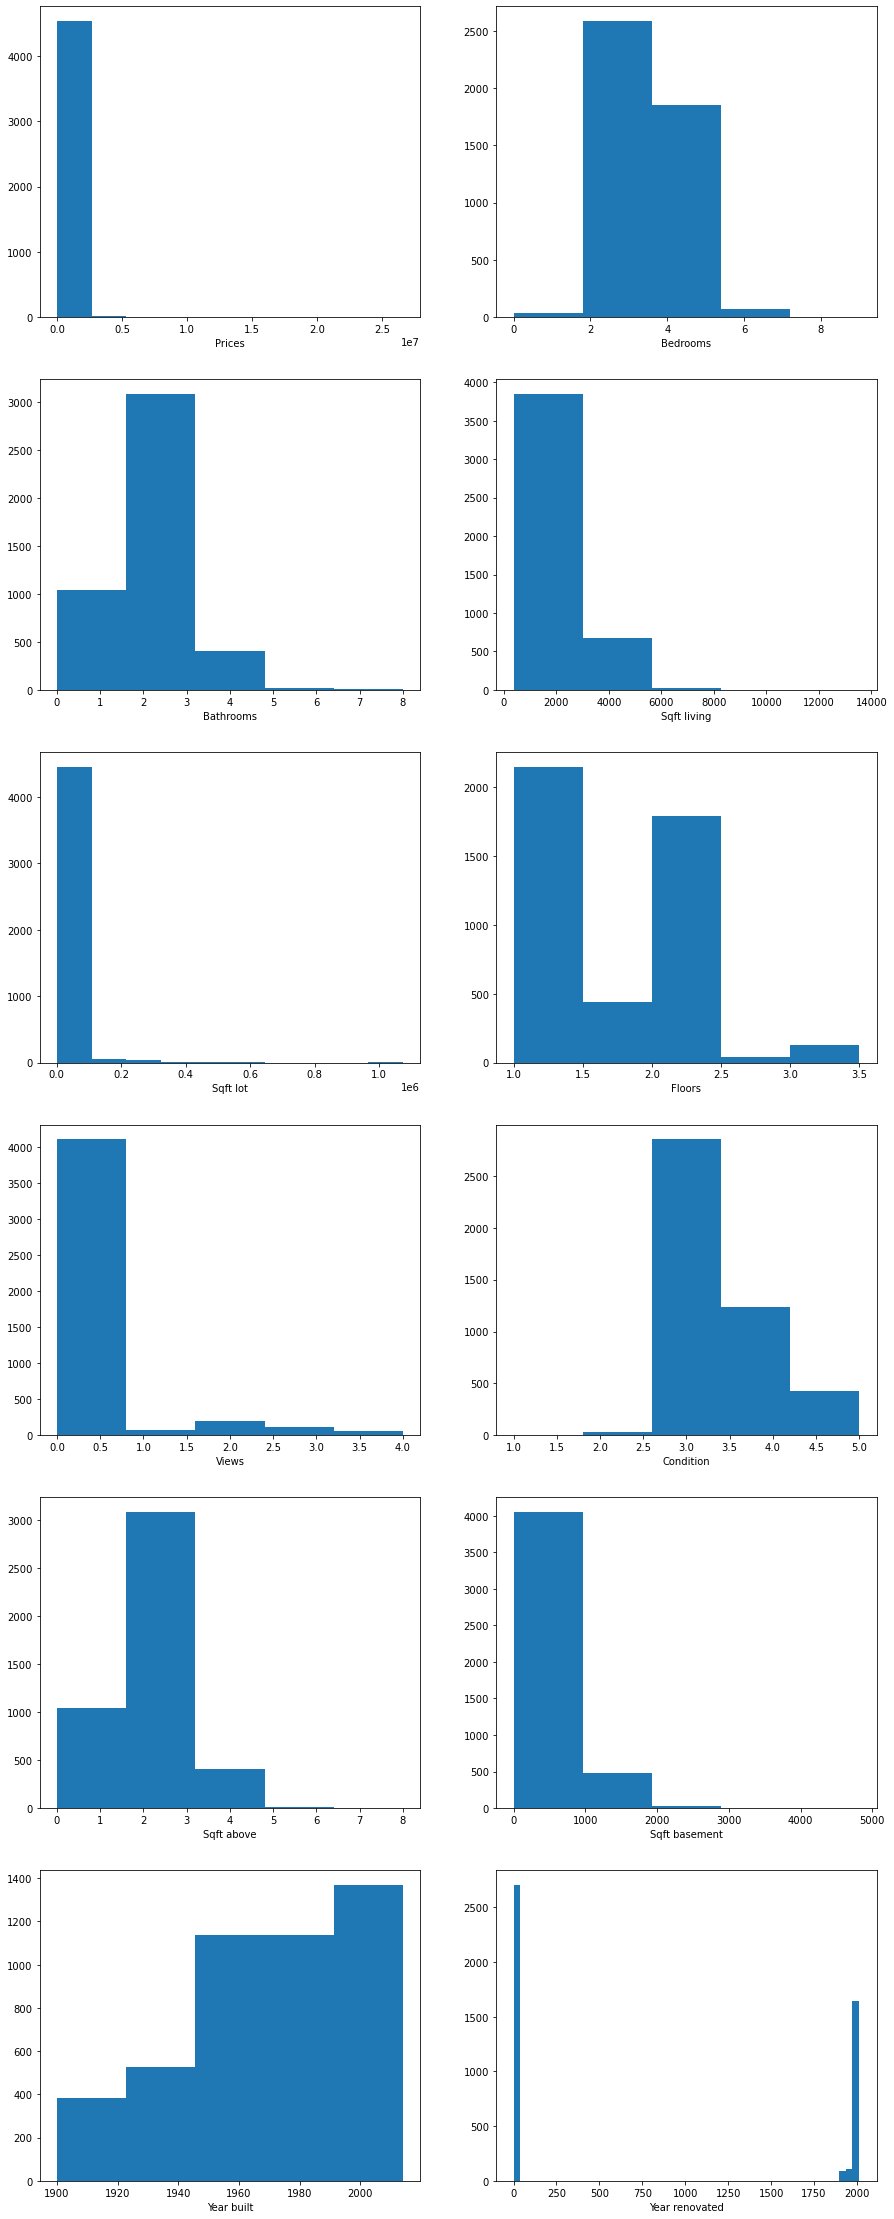

In [83]:
plt.figure(figsize=(15, 40))
ax1 = plt.subplot(6,2,1)
ax1.hist(prices, bins=10)
ax1.set_xlabel('Prices')

ax2 = plt.subplot(6,2,2)
ax2.hist(bedrooms, bins=5)
ax2.set_xlabel('Bedrooms')

ax3 = plt.subplot(6,2,3)
ax3.hist(bathrooms, bins=5)
ax3.set_xlabel('Bathrooms')

ax4 = plt.subplot(6,2,4)
ax4.hist(sqft_living, bins=5)
ax4.set_xlabel('Sqft living')

ax5 = plt.subplot(6,2,5)
ax5.hist(sqft_lot, bins=10)
ax5.set_xlabel('Sqft lot')

ax6 = plt.subplot(6,2,6)
ax6.hist(floors, bins=5)
ax6.set_xlabel('Floors')

ax7 = plt.subplot(6,2,7)
ax7.hist(views, bins=5)
ax7.set_xlabel('Views')

ax8 = plt.subplot(6,2,8)
ax8.hist(conditions, bins=5)
ax8.set_xlabel('Condition')

ax9 = plt.subplot(6,2,9)
ax9.hist(bathrooms, bins=5)
ax9.set_xlabel('Sqft above')

ax10 = plt.subplot(6,2,10)
ax10.hist(sqft_basement, bins=5)
ax10.set_xlabel('Sqft basement')

ax11 = plt.subplot(6,2,11)
ax11.hist(year_built, bins=5)
ax11.set_xlabel('Year built')

ax12 = plt.subplot(6,2,12)
ax12.hist(year_renovated, bins=50)
ax12.set_xlabel('Year renovated')

plt.show()

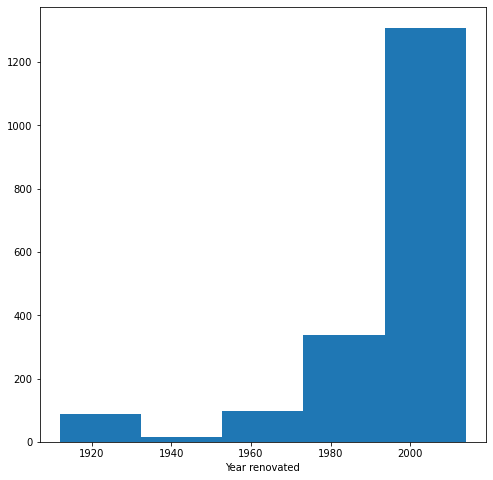

In [84]:
year_renovated = house_price.drop(house_price[house_price.yr_renovated == 0].index, inplace=False).yr_renovated
plt.figure(figsize=(8, 8))
plt.hist(year_renovated, bins=5)
plt.xlabel('Year renovated')
plt.show()

Visualize the dependency of the target on each continuous feature (2d scatter plot).

In [85]:
bedrooms = house_price['bedrooms']
bathrooms = house_price['bathrooms']
sqft_living = house_price['sqft_living']
sqft_lot = house_price['sqft_lot']
floors = house_price['floors']
views = house_price['view']
conditions = house_price['condition']
sqft_above = house_price['sqft_above']
sqft_basement = house_price.sqft_basement
year_built = house_price.yr_built
year_renovated = house_price.yr_renovated

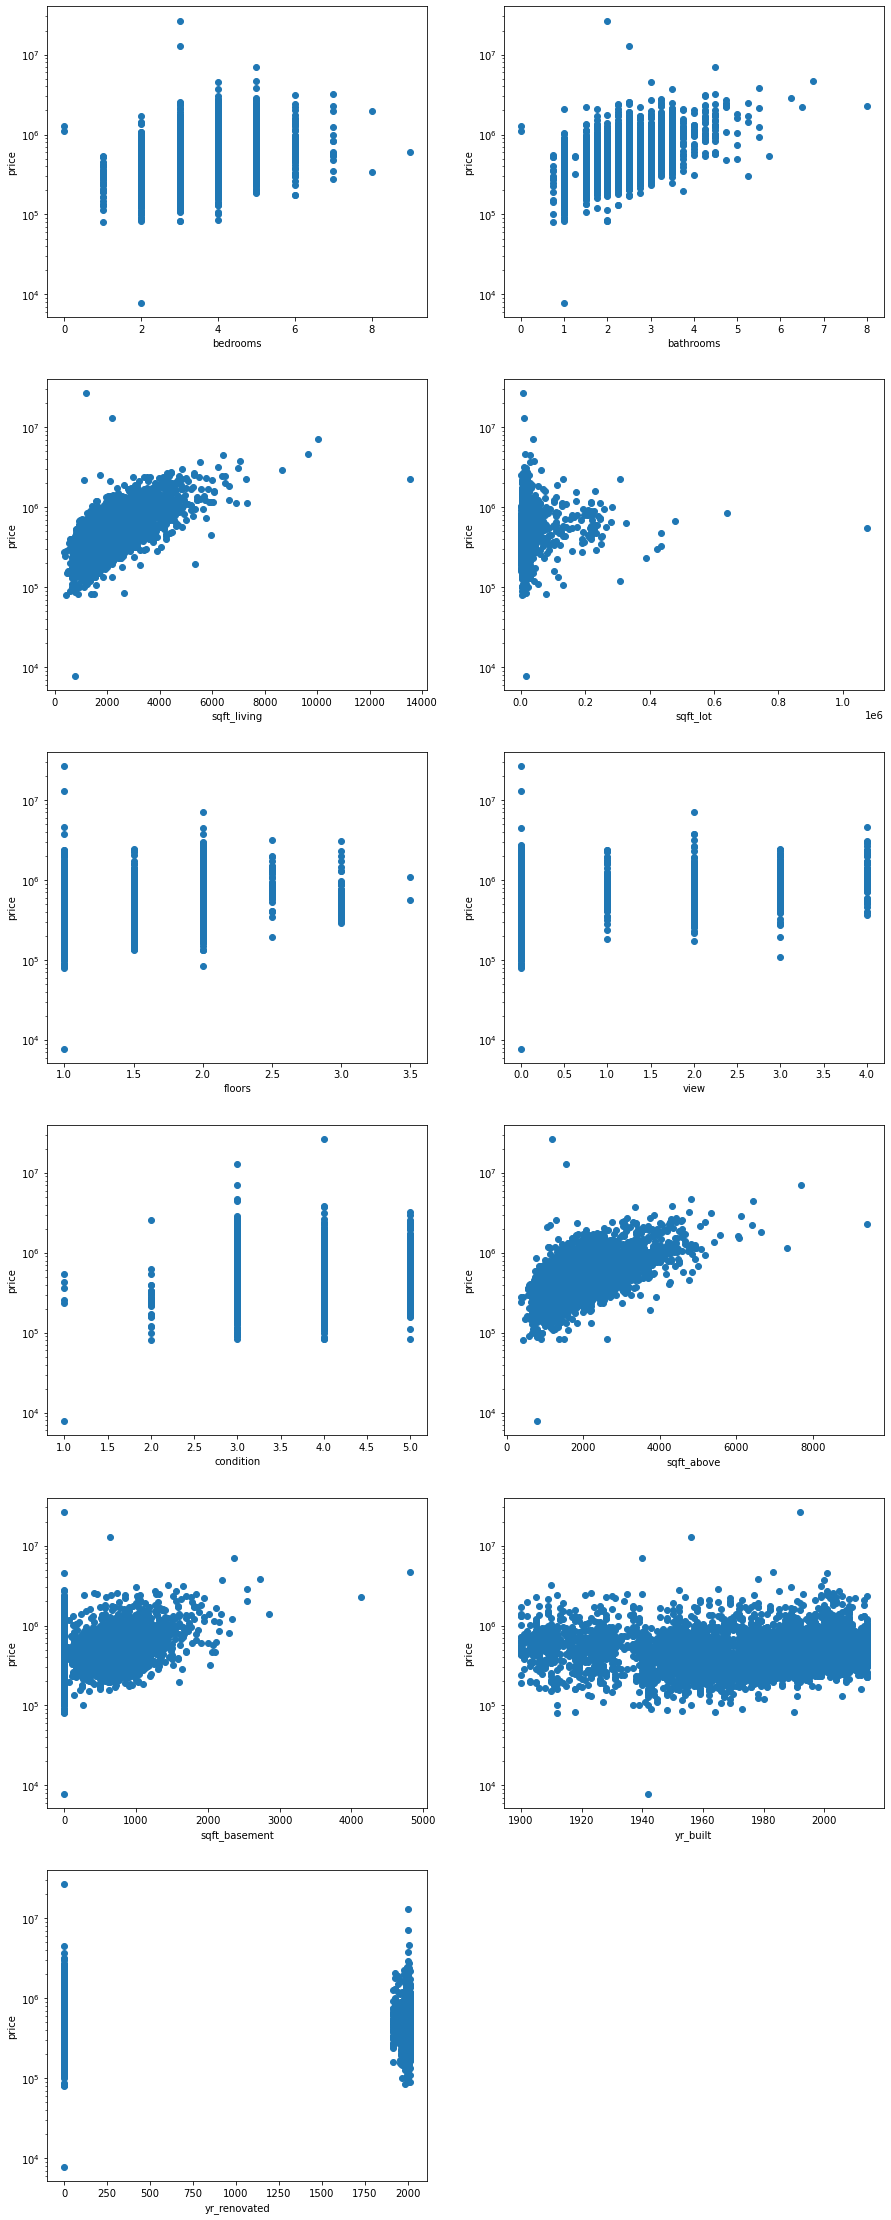

In [86]:
plt.figure(figsize=(15, 40))
ax1 = plt.subplot(6,2,1)
ax1.scatter(bedrooms, prices)
ax1.set_yscale('log')
ax1.set_xlabel('bedrooms')
ax1.set_ylabel('price')

ax2 = plt.subplot(6,2,2)
ax2.scatter(bathrooms, prices)
ax2.set_yscale('log')
ax2.set_xlabel('bathrooms')
ax2.set_ylabel('price')

ax3 = plt.subplot(6,2,3)
ax3.scatter(sqft_living, prices)
ax3.set_yscale('log')
ax3.set_xlabel('sqft_living')
ax3.set_ylabel('price')

ax4 = plt.subplot(6,2,4)
ax4.scatter(sqft_lot, prices)
ax4.set_yscale('log')
ax4.set_xlabel('sqft_lot')
ax4.set_ylabel('price')

ax5 = plt.subplot(6,2,5)
ax5.scatter(floors, prices)
ax5.set_yscale('log')
ax5.set_xlabel('floors')
ax5.set_ylabel('price')

ax6 = plt.subplot(6,2,6)
ax6.scatter(views, prices)
ax6.set_yscale('log')
ax6.set_xlabel('view')
ax6.set_ylabel('price')

ax7 = plt.subplot(6,2,7)
ax7.scatter(conditions, prices)
ax7.set_yscale('log')
ax7.set_xlabel('condition')
ax7.set_ylabel('price')

ax8 = plt.subplot(6,2,8)
ax8.scatter(sqft_above, prices)
ax8.set_yscale('log')
ax8.set_xlabel('sqft_above')
ax8.set_ylabel('price')

ax9 = plt.subplot(6,2,9)
ax9.scatter(sqft_basement, prices)
ax9.set_yscale('log')
ax9.set_xlabel('sqft_basement')
ax9.set_ylabel('price')

ax10 = plt.subplot(6,2,10)
ax10.scatter(year_built, prices)
ax10.set_yscale('log')
ax10.set_xlabel('yr_built')
ax10.set_ylabel('price')

ax11 = plt.subplot(6,2,11)
ax11.scatter(year_renovated, prices)
ax11.set_yscale('log')
ax11.set_xlabel('yr_renovated')
ax11.set_ylabel('price')


plt.show()

Split the data in training and testing set. Use ColumnTransformer to encode categorical variables.
Impute missing values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and
Elasticnet using cross-
validation with the default parameters. Does scaling the data with StandardScaler help? Use the
preprocessing that works best going forward.

In [87]:
house_price['yr_renovated'] = house_price['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)

In [88]:
house_price.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


In [89]:
house_price[['waterfront']] = house_price[['waterfront']].astype('str')
categorical_features = ['city', 'statezip', 'country', 'waterfront']
continuous_features = [feature for feature in list(house_price.columns) if feature not in categorical_features and feature != 'date' and feature != 'price' and feature != 'street']
all_features = continuous_features + categorical_features 

Train - Test Split

In [90]:
price_df = house_price.iloc[:,1]
features_df = house_price[all_features]
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(features_df, price_df, test_size=0.2)

In [91]:
category_check = features_df.dtypes == object
category_check


bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
city              True
statezip          True
country           True
waterfront        True
dtype: bool

Linear Regression

In [92]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, LinearRegression())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.391


In [93]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, LinearRegression())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.656


Ridge Regression

In [94]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
model_ridge.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model_ridge, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.395


In [95]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
model_ridge.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model_ridge, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.658


Lasso

In [96]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(max_iter=1000, tol=10000.008))
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.380


In [97]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(max_iter=5000, tol=1000.009))
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.490


ElasticNet

In [98]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.044


In [99]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.481


It can be observed that Ridge Regression performed the best among all the techniques used. Scaling definitely helped in this case.

Question 4: Classification on the ’credit-g’ dataset

In [100]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import confusion_matrix
# import category_encoders as ce
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [101]:
credit_data = fetch_openml('credit-g', version='active')

C:\Users\Anirudh\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:404: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


In [102]:
print(credit_data)

{'data':     checking_status  duration                  credit_history  \
0                <0       6.0  critical/other existing credit   
1          0<=X<200      48.0                   existing paid   
2       no checking      12.0  critical/other existing credit   
3                <0      42.0                   existing paid   
4                <0      24.0              delayed previously   
..              ...       ...                             ...   
995     no checking      12.0                   existing paid   
996              <0      30.0                   existing paid   
997     no checking      12.0                   existing paid   
998              <0      45.0                   existing paid   
999        0<=X<200      45.0  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv         1169.0  no known savings         >=7   
1               radio/tv         5951.0              <100      1

In [103]:
print(credit_data.data.shape)

(1000, 20)


In [104]:
print(credit_data.target.shape)

(1000,)


In [105]:
df = pd.DataFrame(data=credit_data.data, columns=credit_data.feature_names)

In [106]:
print(df.dtypes)

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
dtype: object


In [107]:
credit_data.feature_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [108]:
credit_data.categories

In [109]:
credit_dataframe = pd.DataFrame(credit_data.data, columns=credit_data.feature_names)
credit_dataframe['class'] = credit_data.target

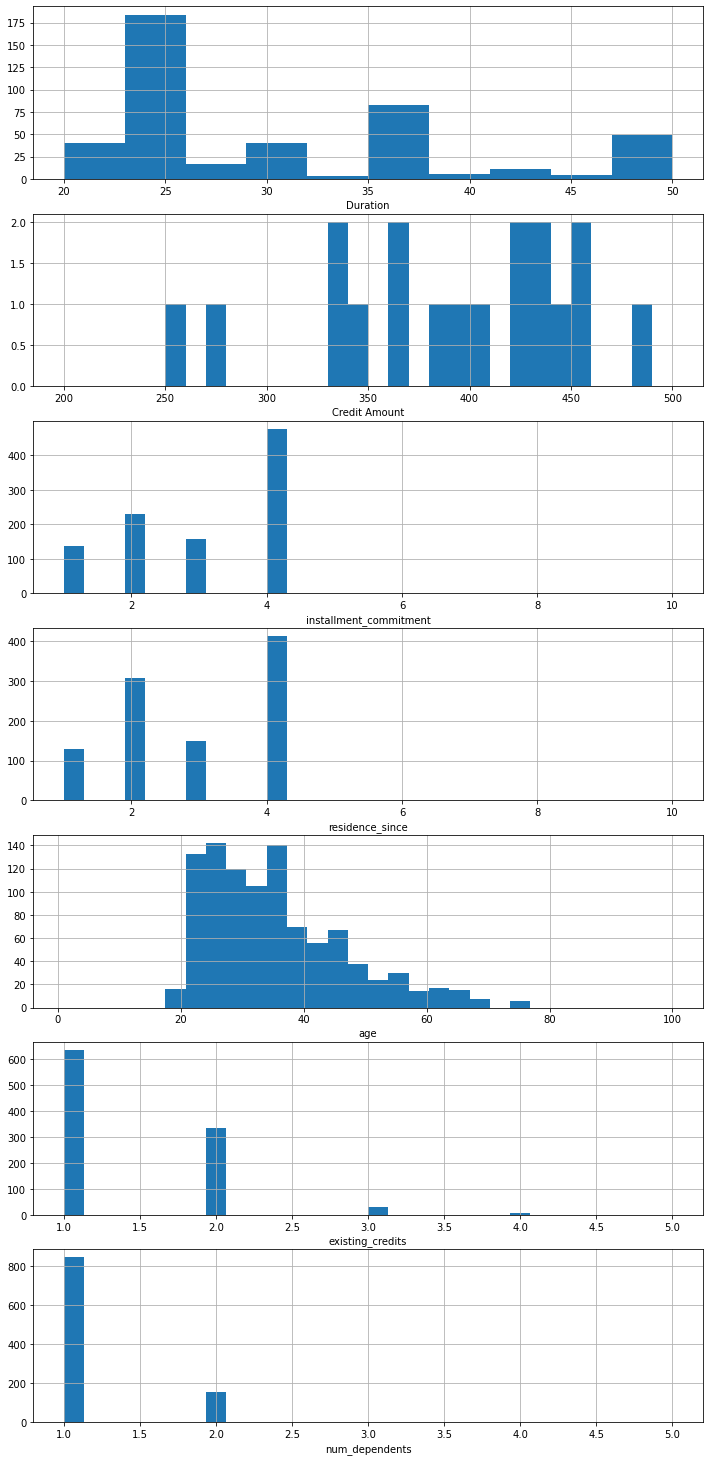

In [110]:
#Univariate Distribution of continuous variables

plt.subplot(14, 1, 1)
df['duration'].hist(bins=10,range=(20,50),figsize =(12, 20))
plt.xlabel('Duration')

plt.subplot(14, 1, 2)
df['credit_amount'].hist(bins=30,range=(200,500),figsize =(12, 20))
plt.xlabel('Credit Amount')

plt.subplot(14, 1, 3)
df['installment_commitment'].hist(bins=30,range=(1,10),figsize =(12, 20))
plt.xlabel('installment_commitment')

plt.subplot(14, 1, 4)
df['residence_since'].hist(bins=30,range=(1,10),figsize =(12, 20))
plt.xlabel('residence_since')

plt.subplot(14, 1, 5)
df['age'].hist(bins=30,range=(1,100),figsize =(12, 20))
plt.xlabel('age')

plt.subplot(14, 1, 6)
df['existing_credits'].hist(bins=30,range=(1,5),figsize =(12, 20))
plt.xlabel('existing_credits')

plt.subplot(14, 1, 7)
df['num_dependents'].hist(bins=30,range=(1,5),figsize =(12, 20))
plt.xlabel('num_dependents')

plt.subplots_adjust(top=2, bottom=0.01)
plt.show()

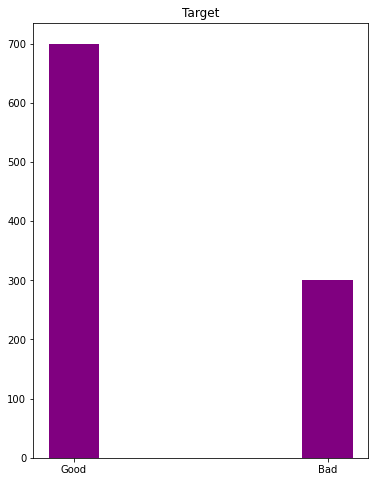

In [125]:
#plot target
cg=0
cb=0
for i in range(len(credit_data.target)):
    if credit_data.target[i]=='good':
        cg=cg+1
    else:
        cb=cb+1
labels=['Good','Bad']
values=[cg,cb]
fig = plt.figure(figsize = (6, 8))
plt.bar(labels, values, color ='purple',
        width = 0.2)
 

plt.title("Target")
plt.show()


In [127]:
#preprocessing

credit_dataX, credit_datay = fetch_openml('credit-g', version='active', as_frame=True, return_X_y =True)
categorical_features = ['checking_status', 'credit_history', 'employment', 'foreign_worker',
'housing',
'job',
'other_parties',
'other_payment_plans',
'own_telephone',
'personal_status',
'property_magnitude',
'purpose',
'savings_status']
credit_dataX_ordinal = credit_dataX.copy()
for feature in credit_dataX.iteritems():
  if feature[0] in categorical_features:
    credit_dataX_ordinal[feature[0]] = credit_dataX[feature[0]].astype("category").cat.codes



C:\Users\Anirudh\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:404: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


In [128]:
credit_dataX_ordinal.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0,6.0,4,3,1169.0,4,4,4.0,2,0,4.0,0,67.0,2,1,2.0,2,1.0,1,0
1,1,48.0,2,3,5951.0,0,2,2.0,1,0,2.0,0,22.0,2,1,1.0,2,1.0,0,0
2,3,12.0,4,6,2096.0,0,3,2.0,2,0,3.0,0,49.0,2,1,1.0,1,2.0,0,0
3,0,42.0,2,2,7882.0,0,3,2.0,2,2,4.0,1,45.0,2,2,1.0,2,2.0,0,0
4,0,24.0,3,0,4870.0,0,2,3.0,2,0,4.0,3,53.0,2,2,2.0,2,2.0,0,0


In [129]:
#Label Encoding
le = LabelEncoder()
y = le.fit_transform(credit_datay)

In [130]:
#train-test split
X_trainval, X_test, y_trainval, y_test = train_test_split(credit_dataX_ordinal, y)

#train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [131]:
numeric_features = [feature for feature in credit_data.feature_names if feature not in categorical_features]

In [132]:
scaler = StandardScaler()
X_train_scaled = X_train
X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])

X_val_scaled = X_val
X_val_scaled[numeric_features] = scaler.fit_transform(X_val_scaled[numeric_features])

logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression.predict(X_val)
logistic_regression.score(X_val, y_val)

<ipython-input-132-421fe6a0e931>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])
C:\Users\Anirudh\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-132-421fe6a0e931>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

0.7925531914893617

In [133]:
#new train - test split
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(credit_dataX, credit_datay)

# creating a Repeated Stratified K fold
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [134]:
#Linear Regression without scaling

preprocess_lr = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_lr = make_pipeline(preprocess_lr, LogisticRegression())
model_lr.fit(X_trainval_pipe, y_trainval_pipe)
scores_lr = cross_val_score(model_lr, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lr)))

score: 0.745


In [135]:
#Linear Regression with scaling

preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression())
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lrs)))

score: 0.751


In [136]:
#SVC without scaling

preprocess_svc = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_svc = make_pipeline(preprocess_svc, LinearSVC())
model_svc.fit(X_trainval_pipe, y_trainval_pipe)
scores_svc = cross_val_score(model_svc, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svc)))

score: 0.741


In [137]:
#SVC with scaling

preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC( max_iter=5000))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svcs)))

score: 0.728


In [138]:
#Nearest Neighbors without scaling

preprocess_knn = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_knn = make_pipeline(preprocess_knn, KNeighborsClassifier())
model_knn.fit(X_trainval_pipe, y_trainval_pipe)
scores_knn = cross_val_score(model_knn, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knn)))

score: 0.695


In [139]:
#Nearest Neigbors with scaling

preprocess_knns = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knns, KNeighborsClassifier())
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knn_scaled = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knn_scaled)))

score: 0.740


We observe that the accuracy improved with the use of StandardScaler for Logistic regression and KNN 
                   
                           NO SCALE  | SCALED
                      
     Logistic regression - 0.745     | 0.751

        SVC              - 0.741     | 0.728

        KNN              - 0.695     | 0.740